### Import required libraries

In [47]:
import numpy as np                   #numpy for arrays
import pywt                          #pywavelett library for waveletts
import matplotlib.image as mpimg     #matplotlib for visualization
import matplotlib.pyplot as plt      #matplotlib for plotting data
import cv2                           #OpenCv for ComputerVision and image properties
import copy

### Read input and Convert to Gray Scale

In [48]:
img = mpimg.imread(r"\Users\DELL\Desktop\lion.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

### 2D wavelett Decomposition

In [49]:
n = 2     #level of Decomposition
w = 'db1' #Type of Wavelett, here I used Daubechies wavelett, we can also use haar wavelett
coeffs = pywt.wavedec2(img,wavelet=w,level=n) #wavelett Decomposition of level n
coeffsd = copy.deepcopy(coeffs)  # save coeffs for future purpose

The above function will return coeffecients <br>
 if n=2, the output is a arrays of tuples [(cA2),(cH2,cV2,cD2),(cH1,cV1,cD1)] <br>
-> cA2 = Approximate Coeff. <br>
-> cH2 = Horizant details(level2) <br>
-> cV2 = Vertical details(level2) <br>
-> cD2 = Diognal details(level2)<br>


### Normalization of Data
Inorder to normalize data we divide each pixel with 255 or the max value of the array

In [50]:
coeffs[0] /= np.abs(coeffs[0]).max()
for eachlevel in range(n):
    coeffs[eachlevel + 1] = [d/(np.abs(d).max()) for d in coeffs[eachlevel + 1]]


### Converting each coefficient matrix into a single matrix

In [51]:
arr, s = pywt.coeffs_to_array(coeffs)  #this function converts coeff. to single array

### Visualization

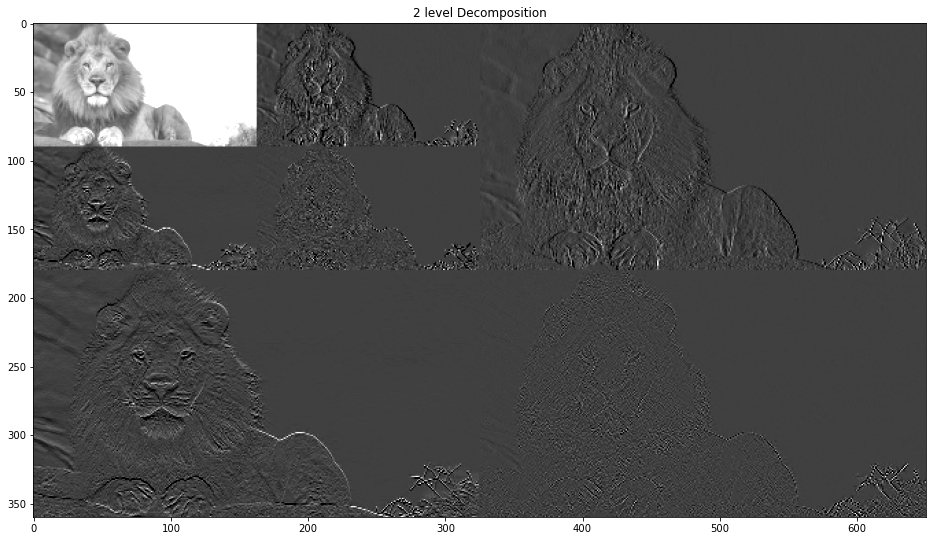

In [52]:
plt.figure(figsize = (16,16))
plt.imshow(arr,cmap='gray',vmin=-0.25,vmax=0.75)
plt.title(str(n)+" level Decomposition")
plt.show()

# Reconstruction

In [53]:
imgr = pywt.waverec2(coeffsd,'db1',mode = 'periodization')
imgr = np.uint8(imgr) 

Text(0.5, 1.0, 'Reconstructed Image.')

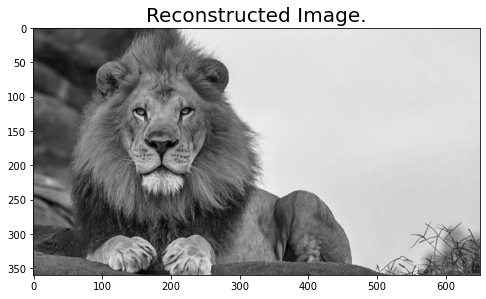

In [54]:
plt.figure(figsize = (8,8))
plt.imshow(imgr,cmap=plt.cm.gray)
plt.title('Reconstructed Image.',fontsize=20)